In [259]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eminecansuakgul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eminecansuakgul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eminecansuakgul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/eminecansuakgul/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Preprocess

In [260]:
dataset = pd.read_excel('amazon.xlsx')
dataset.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [261]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Star     5611 non-null   int64 
 1   HelpFul  5611 non-null   int64 
 2   Title    5559 non-null   object
 3   Review   5593 non-null   object
dtypes: int64(2), object(2)
memory usage: 175.5+ KB


In [262]:
review_col = dataset['Review'] 

### Lowercase all texts

In [263]:
review_col = review_col.str.lower()
dataset.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


#### Remove all punctuations

In [264]:
review_col= review_col.str.replace('[^\w\s]', ' ')
dataset.head()

/var/folders/4v/qy3j96gj6tg3_y8rx_rtdpzr0000gn/T/ipykernel_31532/3026557476.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review_col= review_col.str.replace('[^\w\s]', ' ')


,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


#### Remove all numeric values 

In [265]:
review_col= review_col.str.replace('\d', ' ')
dataset.tail()

/var/folders/4v/qy3j96gj6tg3_y8rx_rtdpzr0000gn/T/ipykernel_31532/2218189848.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  review_col= review_col.str.replace('\d', ' ')


,Star,HelpFul,Title,Review
5606,4,0,Recommend,Great product for reasonable money. Delivered...
5607,5,0,"Terrible , different colors. I returned",Color is way off and panels do not match
5608,5,0,Extremely pleasing,These are great for my studio as they compleme...
5609,5,0,Perfect,Brought out the beauty in kids room. They love...
5610,4,0,Quality Curtains for the price,Very cute curtains in my sons room! Thick enou...


#### Remove stopwords 

In [266]:
sw = stopwords.words('english')
review_col = review_col.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
dataset.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


#### Stop rare words

In [267]:
drops = pd.Series(' '.join(review_col).split()).value_counts()[-1000:]
review_col = review_col.apply(lambda x: " ".join(x for x in x.split() if x not in drops))

#### Tokenization

In [268]:
#review_col.apply(lambda x: TextBlob(x).words)

#### Lemmatization

In [269]:
lemmatizer = WordNetLemmatizer()
review_col= review_col.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

print(review_col.head(20))

0                                                 happy
1        good quality material however panel mi matched
2     product fun bedroom window br imagery bit stre...
3     lo unico que gustaria e que sean un poco ma la...
4     great bang buck believe quality material vibra...
5                                  look different photo
6     exactly looking heavy material great price shi...
7     looking picture thought curtain would thinner ...
8     much whiter thought would really expecting wan...
9     curtain picture show rd set ambesonne curtain ...
10    block view living room front door kitchen dini...
11                       private closed darkening point
12                                          block light
13    work fine night curtain sheer daytime labeled ...
14                                                     
15    love curtain printed polyester type material b...
16                             love hem one smaller one
17    second time writing review amazon always a

## Visualization


In [270]:
tf = review_col.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]

In [271]:
tf.sort_values("tf",ascending=False)

,words,tf
65,curtain,2630.0
42,look,1548.0
118,love,1475.0
102,room,1155.0
162,like,1066.0
...,...,...
3135,daycare,1.0
3134,pam,1.0
3133,hospice,1.0
3132,oms,1.0


<Axes: xlabel='words'>

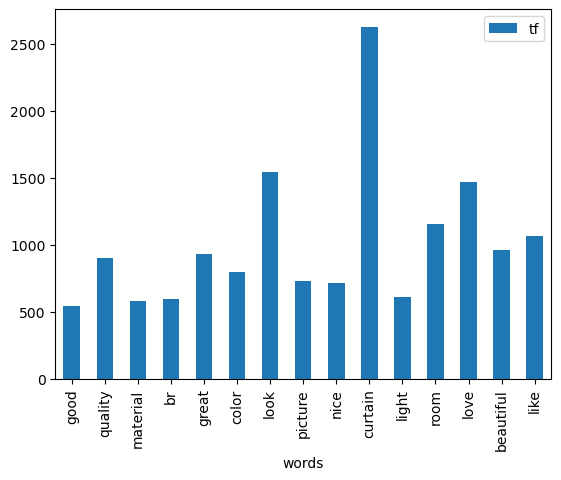

In [272]:
tf[tf["tf"] > 500].plot.bar(x='words', y="tf")

#### WordCloud

In [273]:
text = " ".join(str(i) for i in dataset.Review)
text

'Happy with it Good quality material however the panels are mis-matched. Product was fun for bedroom windows.<br />Imagery a bit stretched, but still fun.<br />Material is not lightweight sheer, which I appreciate.  Lo unico que me gustaria es que sean un poco mas largas Great bang for the buck I can\'t believe the quality of the material. Vibrant colors. I have a very eclectic style and this works beautifully and ties it all together for me. Looks different then photo Was exactly what i was looking for. Heavy material. Great for price and ships fast. Looking at the picture, I thought these curtains would be thinner and more sheer. But they are a very nice thickness/ weight and they help insulate my front window. The look is absolutely PERFECT!! They arrived very quickly. I am VERY VERY pleased with this purchase!! Much whiter than I thought it would be and wasn’t really what I was expecting or wanting. Did not use These are curtains just as the picture shows. This is my 3rd set of Amb

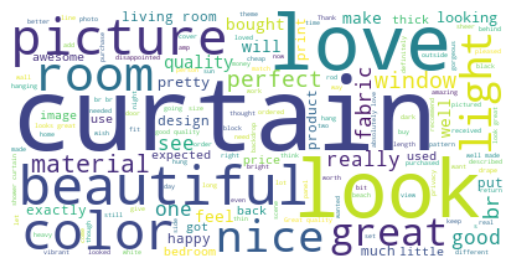

In [274]:
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis

In [275]:
sent_analy = SentimentIntensityAnalyzer()

In [276]:
review_col[0:10].apply(lambda x: sent_analy.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
2    {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [277]:
review_col[0:10].apply(lambda x: sent_analy.polarity_scores(x)['compound'])

0    0.5719
1    0.4404
2    0.8519
3    0.0000
4    0.9042
5    0.0000
6    0.6249
7    0.9080
8    0.0000
9    0.7096
Name: Review, dtype: float64

In [278]:
dataset['polarity_score'] = review_col.apply(lambda x: sent_analy.polarity_scores(x)['compound'])

In [279]:
review_col[0:10].apply(lambda x: 'pos' if sent_analy.polarity_scores(x)['compound'] > 0 else 'neg')


0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [280]:
dataset['sentiment_label'] = review_col.apply(lambda x: 'pos' if sent_analy.polarity_scores(x)['compound'] > 0 else 'neg')


In [281]:
dataset['sentiment_label'].value_counts()

pos    4832
neg     779
Name: sentiment_label, dtype: int64

In [282]:
y = dataset['sentiment_label']
X = review_col

#### Preperation for Modeling

In [283]:
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    random_state=42)

In [284]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

### Sentiment Modeling

In [285]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

In [286]:
y_pred = log_model.predict(x_test_tf_idf_word)

In [287]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

         neg       0.32      0.97      0.48        69
         pos       1.00      0.89      0.94      1334

    accuracy                           0.90      1403
   macro avg       0.66      0.93      0.71      1403
weighted avg       0.96      0.90      0.92      1403



In [288]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8631545500762583

#### Random Comment

In [289]:
random_review = pd.Series(review_col.sample(1).values)
new_comment = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(new_comment)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  nice perfect curtain arrived promised little expensive nice quality nice feel 
 Prediction: ['pos']


#### Random Forest

In [290]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.9002084392475851